# I. Nhập, đánh giá sơ bộ dữ liệu và quyết định thuật toán.

## 1. Import các thư viện cần dùng.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

## 2. Đọc dữ liệu.

In [2]:
dataset = pd.read_csv('iris.csv')

In [3]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print(dataset['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


## 3. Đánh giá sơ bộ dữ liệu.

### 3.1 Trực quan hoá dữ liệu bằng pairplot

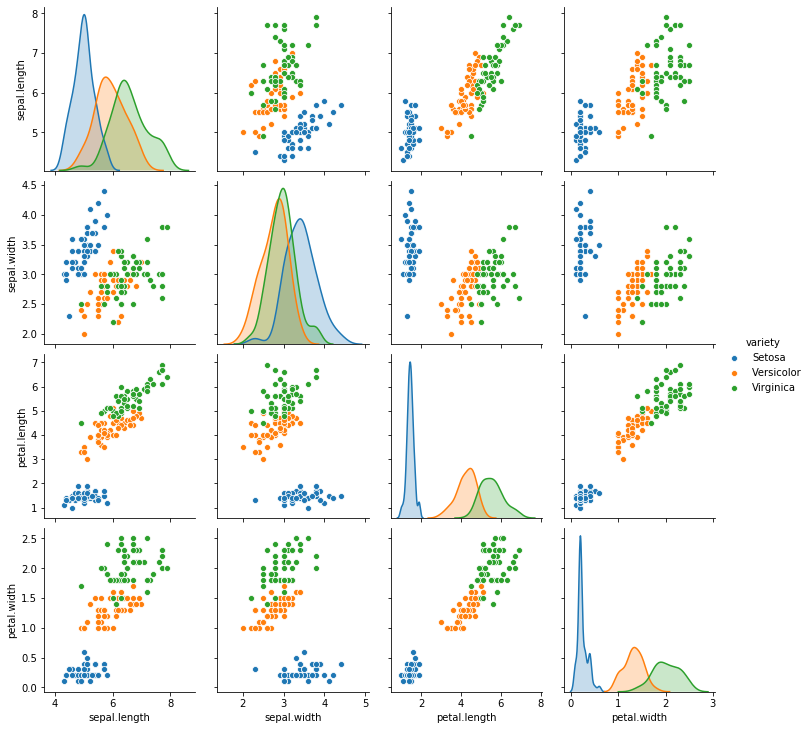

In [5]:
sns.pairplot(dataset, hue = 'variety')
plt.savefig('books_read.png')

### Theo biểu đồ phía trên ta có thể nhận thấy:

Có thể dễ dàng phân loại loài **Setosa** bằng **petal.length** và **petalwidth**, **Setosa** cũng là loài có **Sepal.width** lớn nhất

**Virginica** là loài có **sepal.length** , **petal.width** , **petal.length** trung bình lớn nhất trong ba loài

**Versicolor** là loài các chỉ số ở mức trung bình


### 3.2 Kết luận đánh giá dữ liệu.

 1. Bộ dữ liệu có nhiễu( do Versicolor là loài các chỉ số ở mức trung bình và một số phần tử chiều rộng bất thường của sepal).
 2. Tập dữ liệu nhỏ (150 phần tử).

## 4. Lựa chọn thuật toán.

Dựa vào những kết luận ở trên, ta sẽ sử dụng thuật toán **K-Nearest Neighbor** 

# II. Thuật toán K-Nearest Neighbor.

## 1. Giới thiệu

**K-Nearest Neighbor (KNN)** là một trong nhưng thuật toán **supervised-learning** đơn giản nhất và được xếp vào loại **Lazy-learning**,
khi training, KNN không học bất cứ điều gì từ dữ liệu tranning, mọi tính toán chỉ xảy ra khi cần dự đoán kết quả của dữ liệu mới

## 2. Các bước thực hiện của thuật toán

### Gọi:
    
**T** là dữ liệu của tập traning data và đã được gán nhãn

**x** là dữ liệu mới cần được gán nhãn

**K** là tham số mà bạn định nghĩa

**Bước 1:** Đo khoảng cách từ x đến tất cả phần tử trong T

**Bước 2:** gọi N là K phần tử có khoảng cách (hoặc trọng số) nhỏ nhất với x, đếm số lượng mỗi nhãn xuất hiện

**Bước 3:** Gán nhãn xuất hiện nhiều nhất trong N cho x

## 3. Khoảng các trong không gian

Ta có hai vector:
    
$$A(x_1,x_2,...,x_m), B(y_1,y_2,...,y_m)$$

### Các khoảng cách thường dùng

**1. Khoảng cách Euclide**

$$dist(A,B) = \sqrt{(y_{1^{2}} - x_{1 ^{2}}) + (y_{2^{2}} - x_{2 ^{2}}) + ... + (y_{m^{2}} - x_{m ^{2}})}$$

**2. Khoảng cách cosine**

$$sim(A,B) = \frac{\vec{A}.\vec{B}}{\mid A \mid . \mid B \mid}$$

# III. Tiến hành xây dựng mô hình KNN

## 1. Xây dựng mô hình và tối ưu hoá mô hình.

In [6]:
def preProcessing(dataset):
    #Split feature and label
    y = dataset["variety"]
    dataset = dataset.drop(['variety'], axis=1)
    X = dataset[:]
    return [X,y]

In [7]:
def makePredict(X_train, y_train, X_test, y_test):
    #Choosing best k value
    best_k = getBestK(X_train, y_train, X_test, y_test);
    #Using this k to make model
    knn = KNeighborsClassifier(n_neighbors= best_k, p = 2)   
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy = {(100*accuracy_score(y_test, y_pred))}%")    
    print("-------------------------------------------------------------")
    return y_pred

In [8]:
def getBestK(X_train, y_train, X_test, y_test):
    #visualizing accuracy score vs K_values
    a_index=list(range(1,121))
    a=[]
    x=range(1,121)
    for i in list(range(1,121)):
        model=KNeighborsClassifier(n_neighbors=i) 
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        a.append(metrics.accuracy_score(prediction,y_test))
    plt.figure(figsize=(10, 6))
    plt.plot(a_index, a, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 3)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Accuracy score vs K value")
    plt.savefig('2.png')

# Calculating error for K values between 1 and 106
    param = {'n_neighbors' : range(1,106)}
    knn = KNeighborsClassifier()
    model = GridSearchCV(knn, param, cv = 8)
    model.fit(X_train, y_train)
    print(f"Best K value = {model.best_params_.get('n_neighbors','')}")

#compare errors with k value
    error = []

    # Calculating error for K values between 1 and 106
    for i in range(1, 106):
        knn2 = KNeighborsClassifier(n_neighbors=i)
        knn2.fit(X_train, y_train)
        pred_i = knn2.predict(X_test)
        error.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 106), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=3)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    plt.savefig('1.png')
    
    #return best k value
    return model.best_params_.get('n_neighbors','')


In [9]:
def knnProgresing(dataset):
    #preprocesing dataset
    [X,y] = preProcessing(dataset)
    #Standard scaling dataset
    scaler = StandardScaler()    
    X = pd.DataFrame(scaler.fit_transform(X))
    #slit into train and test dataset
    X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, shuffle = True, stratify = None)
    #Train model using train dataset and make predict in test dataset 
    y_pred = makePredict(X_train, y_train, X_test, y_test)
    #print predict vs test dataset table
    print(pd.concat([y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], ignore_index=False, axis=1))
    print("-------------------------------------------------------------")
    return y_pred

Best K value = 11
Accuracy = 100.0%
-------------------------------------------------------------
        variety   Predicted
73   Versicolor  Versicolor
18       Setosa      Setosa
118   Virginica   Virginica
78   Versicolor  Versicolor
76   Versicolor  Versicolor
31       Setosa      Setosa
64   Versicolor  Versicolor
141   Virginica   Virginica
68   Versicolor  Versicolor
82   Versicolor  Versicolor
110   Virginica   Virginica
12       Setosa      Setosa
36       Setosa      Setosa
9        Setosa      Setosa
19       Setosa      Setosa
56   Versicolor  Versicolor
104   Virginica   Virginica
69   Versicolor  Versicolor
55   Versicolor  Versicolor
132   Virginica   Virginica
29       Setosa      Setosa
127   Virginica   Virginica
26       Setosa      Setosa
128   Virginica   Virginica
131   Virginica   Virginica
145   Virginica   Virginica
108   Virginica   Virginica
143   Virginica   Virginica
45       Setosa      Setosa
30       Setosa      Setosa
----------------------------------

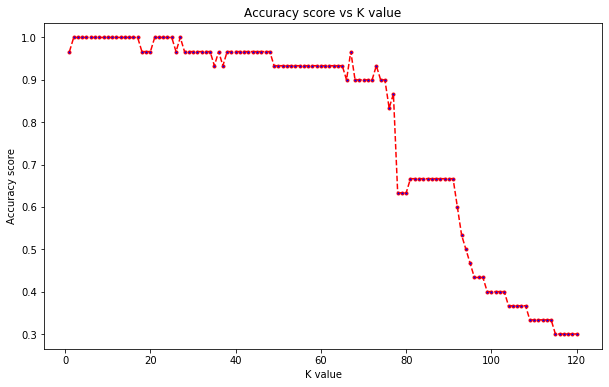

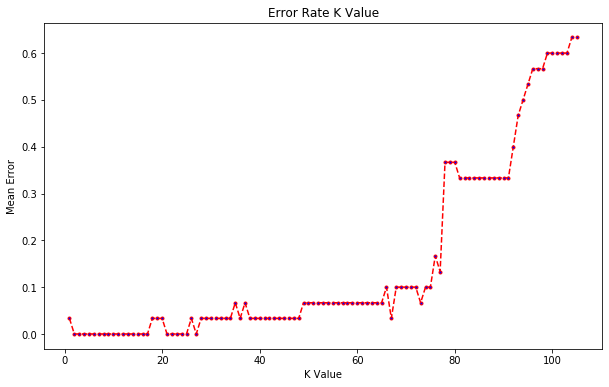

In [10]:
y_pred = knnProgresing(dataset)

## 2. Đánh giá thuật toán

**Ưu Điểm:**

    Khá là trực quan và đơn giản.
    KNN là một thuật toán không có tham số nên độ phức tạp thuật toán gần như bằng 0.
    Không có bước đào tạo.
    Liên tục thực hiện quá trình huấn luyện khi đưa dữ liệu mới vào.
    Dễ dàng sử dụng cho cả Phân loại và Hồi quy.
    
**Nhược Điểm**
    
    Thuật toán chậm nếu bộ dữ liệu trung và lớn.
    KNN nhạy cảm với nhiễu khi cho K nhỏ.
    Việc tính toán nằm toàn bộ ở khâu test.
    Dữ liệu mất cân bằng sẽ ảnh hưởng đến độ chính xác.